In [20]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn-white")
df = sns.load_dataset("mpg").drop("name", axis=1)

df.head(8)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
5,15.0,8,429.0,198.0,4341,10.0,70,usa
6,14.0,8,454.0,220.0,4354,9.0,70,usa
7,14.0,8,440.0,215.0,4312,8.5,70,usa


<AxesSubplot:>

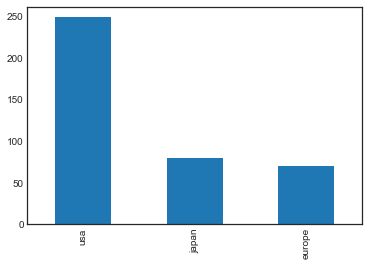

In [21]:
df["origin"].value_counts().plot(kind="bar")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [23]:
df.query("horsepower.isna()")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,usa
126,21.0,6,200.0,NaN,2875,17.0,74,usa
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,usa
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,usa


In [24]:
df.dropna(inplace=True, axis=0)

<AxesSubplot:>

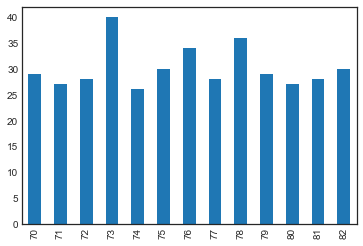

In [25]:
df["model_year"].value_counts().sort_index().plot(kind="bar")

In [26]:
bins = pd.IntervalIndex.from_tuples([(69, 73), (74,77), (78,82)])

df["model_year"] = pd.cut(df["model_year"], bins=bins)

df = pd.get_dummies(df, columns=["model_year", "origin"], drop_first=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,"model_year_(74, 77]","model_year_(78, 82]",origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,0,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,0,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,0,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,0,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,0,0,0,1


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X, y = df.drop("mpg", axis=1).values, df["mpg"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

scaled_X_train.shape, scaled_X_test.shape

((262, 9), (130, 9))

## Multiple linear regression

In [31]:
from sklearn.linear_model import LinearRegression

model_lin_reg = LinearRegression()
model_lin_reg.fit(scaled_X_train, y_train)

intercept, coefficients = model_lin_reg.intercept_, model_lin_reg.coef_

intercept, coefficients

(23.561068702290076,
 array([-0.11056921,  1.00558819, -1.74414263, -4.59937884,  0.00523216,
         0.33079024,  2.67355484,  0.0757955 , -1.25601116]))

## Artificial Neural Network (ANN)

- shallow MLP

In [36]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import SGD

model_shallow = Sequential(name = "Shallow_network")
model_shallow.add(InputLayer(X_train.shape[1]))
model_shallow.add(Dense(1, name = "Output_layer")) ## Note no activation function --> linear activation
model_shallow.compile(loss = "mean_squared_error", optimizer=SGD(learning_rate=0.01))
model_shallow.summary()

Model: "Shallow_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Output_layer (Dense)        (None, 1)                 10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [38]:
model_shallow.fit(scaled_X_train, y_train, epochs=50, verbose=1,
                  validation_data=(scaled_X_test, y_test))

Epoch 1/50
9/9 [==============================] - 1s 27ms/step - loss: 520.2778 - val_loss: 368.3412
Epoch 2/50
9/9 [==============================] - 0s 6ms/step - loss: 352.1439 - val_loss: 251.9287
Epoch 3/50
9/9 [==============================] - 0s 9ms/step - loss: 248.8605 - val_loss: 172.5190
Epoch 4/50
9/9 [==============================] - 0s 7ms/step - loss: 175.8627 - val_loss: 121.1236
Epoch 5/50
9/9 [==============================] - 0s 8ms/step - loss: 126.2428 - val_loss: 83.7286
Epoch 6/50
9/9 [==============================] - 0s 9ms/step - loss: 91.2939 - val_loss: 58.9583
Epoch 7/50
9/9 [==============================] - 0s 8ms/step - loss: 67.0032 - val_loss: 42.7053
Epoch 8/50
9/9 [==============================] - 0s 7ms/step - loss: 50.8052 - val_loss: 31.1841
Epoch 9/50
9/9 [==============================] - 0s 6ms/step - loss: 38.8884 - val_loss: 23.7810
Epoch 10/50
9/9 [==============================] - 0s 8ms/step - loss: 30.8080 - val_loss: 18.8458
Epoch 11/

In [42]:
df_loss = pd.DataFrame(model_shallow.history.history)
df_loss.head()

,loss,val_loss
0,520.277771,368.341248
1,352.143890,251.928726
2,248.860474,172.518967
3,175.862671,121.123604
4,126.242767,83.728615


In [44]:
df_loss.index = range(1, len(df_loss)+1)
df_loss.head()

,loss,val_loss
1,520.277771,368.341248
2,352.143890,251.928726
3,248.860474,172.518967
4,175.862671,121.123604
5,126.242767,83.728615


<AxesSubplot:xlabel='Epochs', ylabel='MSE loss'>

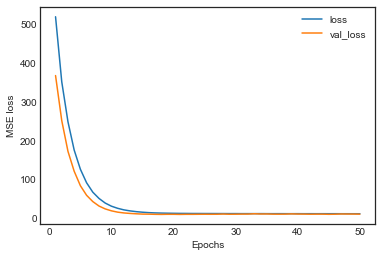

In [45]:
df_loss.plot(xlabel="Epochs", ylabel="MSE loss")

In [46]:
weights, bias = model_shallow.layers[0].get_weights()

print(f"Linear reg: {intercept=}, {coefficients=}")
print(f"ANN {bias=}, {weights=}")

Linear reg: intercept=23.561068702290076, coefficients=array([-0.11056921,  1.00558819, -1.74414263, -4.59937884,  0.00523216,
        0.33079024,  2.67355484,  0.0757955 , -1.25601116])
ANN bias=array([23.519123], dtype=float32), weights=array([[-0.24513017],
       [-0.6212706 ],
       [-1.8171463 ],
       [-2.9931092 ],
       [-0.2376727 ],
       [ 0.19079323],
       [ 2.588708  ],
       [ 0.18643644],
       [-0.92951304]], dtype=float32)


## Prediction and evaluation

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred_ANN = model_shallow.predict(scaled_X_test)
y_pred_lin_reg = model_lin_reg.predict(scaled_X_test)

print("MAE, RMSE for ANN")
print(mean_squared_error(y_test, y_pred_ANN), np.sqrt(mean_absolute_error(y_test, y_pred_ANN)))

print("MAE, RMSE for linear regression")
print(mean_squared_error(y_test, y_pred_lin_reg), np.sqrt(mean_absolute_error(y_test, y_pred_lin_reg)))

MAE, RMSE for ANN
10.247671256052348 1.605934988609704
MAE, RMSE for linear regression
10.164385186712916 1.6134489397848808
